# Задания Scipy

**Импорт библиотек**

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy.stats import bartlett, ttest_ind, mannwhitneyu

**Задание №1**

Воспользуйтесь таблицей HairEyeColor. Ваша задача 
а) в переменнуюblond_men сохранить долю блондинов (Blond) от общего числа кареглазых мужчин; 
б) посчитайте число голубоглазых женщин в наборе данных HairEyeColor; 
в) постройте столбчатую диаграмму распределения цвета глаз по цвету волос только у женщин из таблицы HairEyeColor. По оси X должен идти цвет волос, цвет столбиков должен отражать цвет глаз. По 
оси Y - количество наблюдений.

In [230]:
# Загружаем файл
file_path = 'info-folder/data/HairEyeColor.csv'
hair_eye_data = pd.read_csv(file_path)

# Посмотрим на структуру данных
hair_eye_data.head()

,rownames,Hair,Eye,Sex,Freq
0,1,Black,Brown,Male,32
1,2,Brown,Brown,Male,53
2,3,Red,Brown,Male,10
3,4,Blond,Brown,Male,3
4,5,Black,Blue,Male,11


In [231]:
# а) Доля блондинистых мужчин среди кареглазых
# Фильтруем данные для мужчин с карими глазами
brown_eye_men = hair_eye_data[(hair_eye_data['Eye'] == 'Brown') & (hair_eye_data['Sex'] == 'Male')]

# Общее количество кареглазых мужчин
total_brown_eye_men = brown_eye_men['Freq'].sum()

# Количество блондинистых кареглазых мужчин
blond_brown_eye_men = brown_eye_men[brown_eye_men['Hair'] == 'Blond']['Freq'].sum()

# Доля блондинистых мужчин
blond_men = blond_brown_eye_men / total_brown_eye_men
blond_men

np.float64(0.030612244897959183)

In [232]:
# б) Число голубоглазых женщин
# Фильтруем данные для женщин с голубыми глазами
blue_eye_women = hair_eye_data[(hair_eye_data['Eye'] == 'Blue') & (hair_eye_data['Sex'] == 'Female')]

# Суммируем количество голубоглазых женщин
blue_eye_women_count = blue_eye_women['Freq'].sum()
blue_eye_women_count

np.int64(114)

In [233]:
# в) Построение столбчатой диаграммы для женщин по цвету волос и цвета глаз
# Фильтруем данные для женщин
women_data = hair_eye_data[hair_eye_data['Sex'] == 'Female']

# Строим сводную таблицу для распределения по цвету волос и глаз
pivot_table = women_data.pivot_table(values='Freq', index='Hair', columns='Eye', aggfunc='sum', fill_value=0)
pivot_table

Eye,Blue,Brown,Green,Hazel
Hair,,,,
Black,9,36,2,5
Blond,64,4,8,5
Brown,34,66,14,29
Red,7,16,7,7


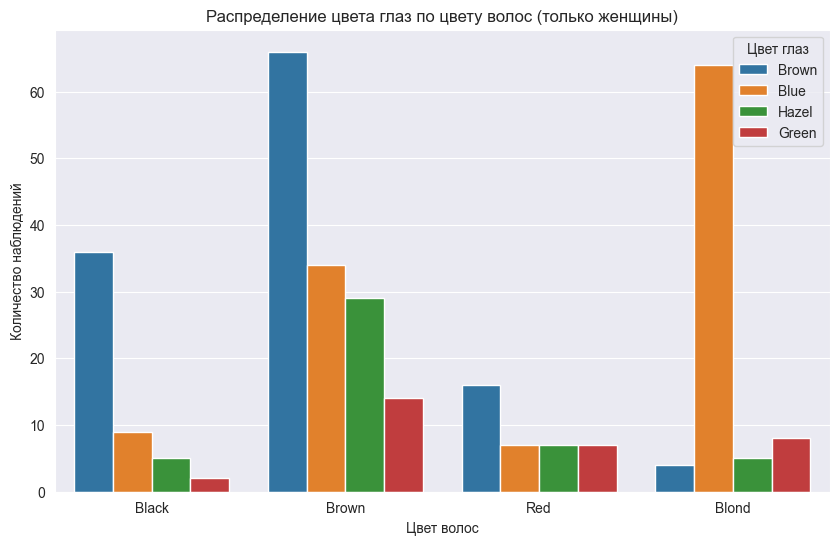

In [234]:
# Фильтруем данные только для женщин
women_data = hair_eye_data[hair_eye_data['Sex'] == 'Female']

# Создаем столбчатую диаграмму распределения цвета глаз по цвету волос
plt.figure(figsize=(10, 6))
sns.barplot(data=women_data, x='Hair', y='Freq', hue='Eye')

# Настройка диаграммы
plt.xlabel("Цвет волос")
plt.ylabel("Количество наблюдений")
plt.title("Распределение цвета глаз по цвету волос (только женщины)")
plt.legend(title="Цвет глаз")

plt.show()

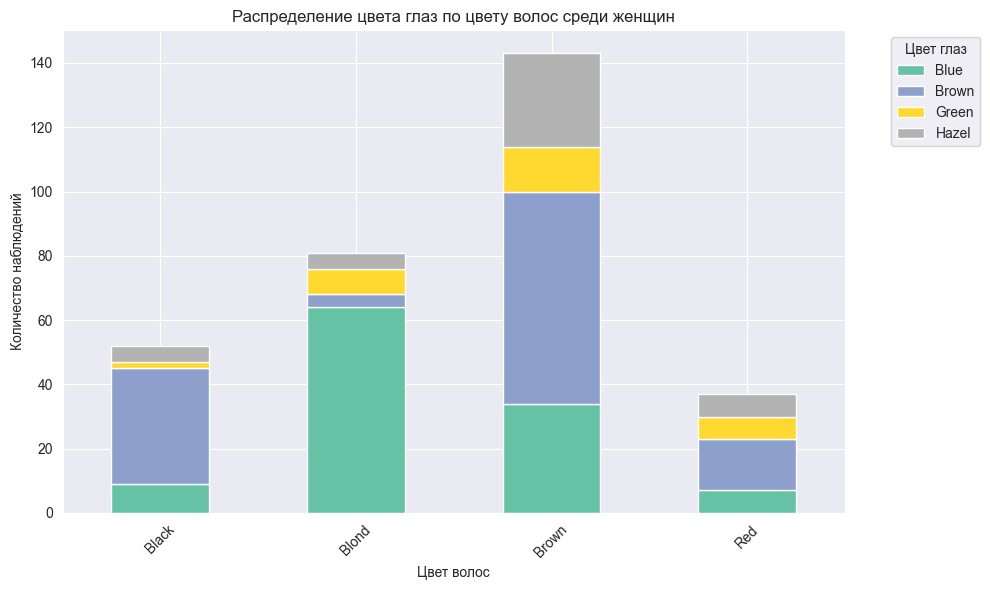

(np.float64(0.030612244897959183), np.int64(114))

In [235]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set2')
plt.title('Распределение цвета глаз по цвету волос среди женщин')
plt.xlabel('Цвет волос')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.legend(title='Цвет глаз', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Выводим график и результаты
plt.show()

blond_men, blue_eye_women_count

**Задание №2**

На основе таблицы HairEyeColor создайте ещё одну таблицу, в которой  хранится информация о распределении цвета глаз у женщин-брюнеток (Hair = 'Black'). Проведите тест равномерности распределения цвета глаз у брюнеток и выведите значение хи-квадрата для этого теста.

In [236]:
# Фильтруем данные для женщин с черными волосами (брюнеток)
black_hair_women = hair_eye_data[(hair_eye_data['Hair'] == 'Black') & (hair_eye_data['Sex'] == 'Female')]

# Формируем таблицу распределения цвета глаз у женщин-брюнеток
black_hair_eye_distribution = black_hair_women[['Eye', 'Freq']].set_index('Eye')

# Выполняем тест хи-квадрат на равномерность распределения цвета глаз
chi2_stat, p_value = chisquare(black_hair_eye_distribution['Freq'])

# Выводим таблицу и значение хи-квадрата
black_hair_eye_distribution, chi2_stat

(       Freq
 Eye        
 Brown    36
 Blue      9
 Hazel     5
 Green     2,
 np.float64(56.15384615384616))

Значение статистики хи-квадрат для проверки равномерности распределения цвета глаз у брюнеток равно 56.15. Это высокое значение предполагает, что распределение цвета глаз значительно отклоняется от равномерного.

**Задание №3**

Воспользуемся данными из таблицы diamonds. При помощи критерия Хи - квадрат проверьте гипотезу о взаимосвязи цены (price) и каратов (carat) бриллиантов. Для этого сначала нужно перевести эти количественные переменные в формат пригодный для Хи - квадрат. Создайте две новые переменные в данных diamonds:

factor_price - где будет 1, если значение цены больше либо равно чем среднее, и 0, если значение цены ниже среднего цены по выборке.

factor_carat - где будет 1, если число карат больше либо равно чем среднее, и 0, если ниже среднего числа карат по выборке.

Важный момент - на больших данных цикл for() работает довольно медленно, постарайтесь решить эту задачу без его использования!

Используя эти шкалы при помощи Хи - квадрат проверьте исходную гипотезу. Сохраните в переменную main_stat значение критерия Хи - квадрат.

In [237]:
# Загружаем данные из таблицы diamonds
diamonds = pd.read_csv('info-folder/data/diamonds.csv')

# Посмотрим на первые строки, чтобы понять структуру данных
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [238]:
# Вычислим средние значения для `price` и `carat`
mean_price = diamonds['price'].mean()
mean_carat = diamonds['carat'].mean()

# Создадим переменные `factor_price` и `factor_carat` без цикла for, используя сравнение и преобразование данных
diamonds['factor_price'] = (diamonds['price'] >= mean_price).astype(int)
diamonds['factor_carat'] = (diamonds['carat'] >= mean_carat).astype(int)

# Проверим, что новые столбцы добавлены и отображают нужные значения
diamonds[['price', 'factor_price', 'carat', 'factor_carat']].head()

,price,factor_price,carat,factor_carat
0,326,0,0.23,0
1,326,0,0.21,0
2,327,0,0.23,0
3,334,0,0.29,0
4,335,0,0.31,0


Создается таблица частот (контингентная таблица) для двух категориальных переменных.

In [239]:
contingency_table = pd.crosstab(diamonds['factor_price'], diamonds['factor_carat'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Сохраним значение статистики
main_stat = chi2_stat

Выводим значение статистики Хи-квадрат и p-значение для проверки гипотезы.


In [240]:
print("Хи-квадрат статистика:", main_stat)
print("p-значение:", p_val)

Хи-квадрат статистика: 40735.2227968624
p-значение: 0.0


При таком низком p-значении отклоняем нулевую гипотезу о независимости между ценой (price) и числом карат (carat). Это означает, что между этими переменными существует статистически значимая взаимосвязь.

Цены бриллиантов и их вес (в каратах) связаны: более тяжелые бриллианты (больше карат) чаще имеют более высокую цену.

**Задание №4**

Воспользуйтесь таблицей mtcars. При помощи точного критерия Фишера проверьте гипотезу о взаимосвязи типа коробки передач (am) и типа двигателя (vs) в данных mtcars. Результат выполнения критерия сохраните в переменную. Получившийся p - уровень значимости сохраните в переменную fisher_test.

In [241]:
# Шаг 1: Загрузить данные
mtcars = pd.read_csv("info-folder/data/mtcars.csv")

# Шаг 2: Построить таблицу сопряженности между переменными `am` и `vs`
contingency_table = pd.crosstab(mtcars['am'], mtcars['vs'])

# Шаг 3: Применить тест Фишера
_, fisher_test = fisher_exact(contingency_table)

# Шаг 4: Вывод результата
print("p-уровень значимости для критерия Фишера:", fisher_test)

p-уровень значимости для критерия Фишера: 0.47269744160177996


**Задание №5**

Воспользуйтесь таблицей ToothGrowth. Данные позволяют исследовать рост зубов у морских свинок в зависимости от дозировки витамина C и типа потребляемых продуктов. Сравните среднее значение длины зубов свинок, которые потребляли апельсиновый сок (OJ) с дозировкой 0.5 миллиграмм, со средним значением длины зубов свинок, которые потребляли аскорбиновую кислоту (VC) с дозировкой 2 миллиграмма. Значение t - критерия сохраните в 
переменную t_stat.

In [242]:
data = pd.read_csv("info-folder/data/ToothGrowth.csv")

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  60 non-null     int64  
 1   len       60 non-null     float64
 2   supp      60 non-null     object 
 3   dose      60 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


(   rownames   len supp  dose
 0         1   4.2   VC   0.5
 1         2  11.5   VC   0.5
 2         3   7.3   VC   0.5
 3         4   5.8   VC   0.5
 4         5   6.4   VC   0.5,
 None)

In [243]:
# Filter the data for the two specified groups

oj_05 = data[(data['supp'] == 'OJ') & (data['dose'] == 0.5)]['len']
vc_2 = data[(data['supp'] == 'VC') & (data['dose'] == 2.0)]['len']

# Perform the t-test
t_stat, p_value = ttest_ind(oj_05, vc_2, equal_var=False)

t_stat, p_value

(np.float64(-6.232482137515355), np.float64(7.196253524006046e-06))

    **Задание №6**

В этом задании нужно проверить гипотезу о равенстве средних двух выборок, загрузив набор данных из файла «dataset_11504_15.txt» и выполнив все необходимые операции на вашем компьютере. В скачанных данных вы найдете две переменные: количественную переменную, и номинативную переменную с двумя градациями (которая разделяет наблюдения на две группы).

Сначала с помощью теста Бартлетта проверьте гомогенность дисперсий двух выборок. В случае, если дисперсии значимо не отличаются (с уровнем 0.05), примените тест Стьюдента, иначе - непараметрический тест (Манна-Уитни). Выведите получившийся p-value, с точностью четыре знака после запятой.

In [244]:
# Данные
data11504 = [
    (-1.665, 1), (-3.638, 1), (-3.3, 1), (2.614, 1), (2.231, 1), (-3.392, 1), 
    (0.358, 1), (4.976, 1), (-3.132, 1), (0.671, 1), (2.183, 1), (-4.491, 1), 
    (-3.626, 1), (1.681, 1), (-2.716, 1), (5.201, 1), (3.332, 1), (-2.086, 1), 
    (1.762, 1), (-5.032, 1), (-6.969, 1), (-2.203, 1), (3.57, 1), (2.029, 1), 
    (-5.483, 1), (-0.391, 1), (-1.334, 1), (-3.286, 1), (-0.266, 1), (3.732, 1), 
    (-0.286, 1), (1.692, 1), (0.459, 1), (-3.428, 1), (-4.705, 1), (-5.588, 1), 
    (2.302, 1), (1.721, 1), (3.81, 1), (-1.008, 1), (0.184, 1), (0.222, 1), 
    (-3.723, 1), (0.51, 1), (0.044, 1), (4.783, 1), (-0.702, 1), (-2.183, 1), 
    (-6.242, 1), (3.784, 1), (-0.494, 2), (4.301, 2), (5.027, 2), (-2.954, 2), 
    (2.005, 2), (0.187, 2), (4.286, 2), (-0.061, 2), (2.999, 2), (0.354, 2), 
    (-4.225, 2), (1.128, 2), (2.067, 2), (7.354, 2), (-2.747, 2), (-0.62, 2), 
    (2.127, 2), (2.589, 2), (0.394, 2), (4.037, 2), (-0.259, 2), (2.397, 2), 
    (-1.297, 2), (-2.085, 2), (-6.259, 2), (-1.044, 2), (0.154, 2), (-1.585, 2), 
    (-2.733, 2), (7.489, 2), (-0.733, 2), (0.861, 2), (-4.449, 2), (4.416, 2), 
    (1.094, 2), (-0.103, 2), (0.442, 2), (-1.567, 2), (-3.259, 2), (-2.785, 2), 
    (1.685, 2), (-4.602, 2), (-4.761, 2), (4.954, 2), (2.176, 2), (0.596, 2), 
    (2.161, 2), (-2.943, 2), (0.101, 2), (3.692, 2)
]

# Разделение данных на группы
group1 = [x[0] for x in data11504 if x[1] == 1]
group2 = [x[0] for x in data11504 if x[1] == 2]

# Тест Бартлетта
bartlett_stat, bartlett_p = bartlett(group1, group2)

p = 0.05
# Выбор и выполнение теста
if bartlett_p >= p:
    # Гомогенность дисперсий: применяем t-тест
    test_stat, p_value = ttest_ind(group1, group2)
else:
    # Дисперсии значимо различны: применяем тест Манна-Уитни
    test_stat, p_value = mannwhitneyu(group1, group2)

round(p_value, 4), bartlett_p

(np.float64(0.1441), np.float64(0.8272024304173038))

Пояснение:

Тест Бартлетта: Проверяет, различаются ли дисперсии двух выборок. Если p-value больше 0.05, это означает, что дисперсии не различаются значимо.

Тест Стьюдента: Если дисперсии равны (по результатам теста Бартлетта), применяем стандартный t-тест для независимых выборок.

Тест Манна-Уитни: Если дисперсии различаются (по результатам теста Бартлетта), применяем непараметрический тест Манна-Уитни для сравнения двух независимых выборок.

